In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [4]:
train_df.isna()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8063,False,False,False,False,False,True,False,False,False,False,False
8064,False,False,False,False,False,False,False,False,False,False,False
8065,False,False,False,False,False,False,False,False,False,False,False
8066,False,False,False,False,False,False,False,False,False,False,False


In [5]:
test_df.isna()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2622,False,False,False,False,False,False,False,False,False,False
2623,False,False,False,False,False,False,False,False,False,False
2624,False,False,False,False,False,False,True,False,False,False
2625,False,False,False,False,False,False,False,False,False,False


In [6]:
!pip install --user --upgrade numpy

In [7]:
!pip install --user pyldavis

In [8]:
!pip install --upgrade scikit-learn

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
# Select relevant columns for segmentation
selected_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
df_selected = train_df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
df_selected['Gender'] = label_encoder.fit_transform(df_selected['Gender'])
df_selected['Ever_Married'] = label_encoder.fit_transform(df_selected['Ever_Married'])
df_selected['Graduated'] = label_encoder.fit_transform(df_selected['Graduated'])
df_selected['Profession'] = label_encoder.fit_transform(df_selected['Profession'])
df_selected['Spending_Score'] = label_encoder.fit_transform(df_selected['Spending_Score'])
df_selected['Var_1'] = label_encoder.fit_transform(df_selected['Var_1'])
df_selected['Segmentation'] = label_encoder.fit_transform(df_selected['Segmentation'])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [11]:
df_scaled

array([[ 0.90145382, -1.20393817, -1.30341502, ...,  0.76011295,
        -0.83623949,  1.29798127],
       [-1.10931917,  0.83060744,  1.42009199, ..., -1.20757975,
         0.58304653, -0.48353545],
       [ 0.90145382,  0.83060744,  1.42009199, ..., -0.55168218,
         0.58304653, -0.48353545],
       ...,
       [-1.10931917, -1.20393817, -0.63766886, ..., -1.20757975,
         0.58304653,  1.29798127],
       [-1.10931917, -1.20393817, -1.00080313, ...,  0.76011295,
         0.58304653, -0.48353545],
       [ 0.90145382,  0.83060744, -0.39557935, ...,  0.10421538,
        -0.83623949, -0.48353545]])

In [12]:
print(type(df_selected))

<class 'pandas.core.frame.DataFrame'>


In [13]:
print(df_selected.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [15]:
print(df_selected.columns)
print(df_selected.dtypes)

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
Gender               int32
Ever_Married         int32
Age                  int64
Graduated            int32
Profession           int32
Work_Experience    float64
Spending_Score       int32
Family_Size        float64
Var_1                int32
Segmentation         int32
dtype: object


In [16]:
print(type(df_scaled))
print(df_scaled.shape)

<class 'numpy.ndarray'>
(6665, 10)


In [17]:
print(df_selected.head())

   Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0       1             0   22          0           5              1.0   
2       0             1   67          1           2              1.0   
3       1             1   67          1           7              0.0   
5       1             1   56          0           0              0.0   
6       1             0   32          1           5              1.0   

   Spending_Score  Family_Size  Var_1  Segmentation  
0               2          4.0      3             3  
2               2          1.0      5             1  
3               1          2.0      5             1  
5               0          2.0      5             2  
6               2          3.0      5             2  


In [18]:
!pip show numpy

Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: c:\users\asus\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, bokeh, Bottleneck, contourpy, daal4py, datashader, datashape, fst-pso, FuzzyTM, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, jax, matplotlib, miniful, mkl-fft, mkl-random, ml-dtypes, numba, numexpr, opt-einsum, pandas, patsy, pyerfa, pyFUME, pyLDAvis, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, simpful, statsmodels, tables, tensorboard, tensorflow-intel, tifffile, transformers, xarray


In [19]:
!pip install --upgrade threadpoolctl

In [20]:
type(df_scaled)

numpy.ndarray

In [21]:
df_scaled

array([[ 0.90145382, -1.20393817, -1.30341502, ...,  0.76011295,
        -0.83623949,  1.29798127],
       [-1.10931917,  0.83060744,  1.42009199, ..., -1.20757975,
         0.58304653, -0.48353545],
       [ 0.90145382,  0.83060744,  1.42009199, ..., -0.55168218,
         0.58304653, -0.48353545],
       ...,
       [-1.10931917, -1.20393817, -0.63766886, ..., -1.20757975,
         0.58304653,  1.29798127],
       [-1.10931917, -1.20393817, -1.00080313, ...,  0.76011295,
         0.58304653, -0.48353545],
       [ 0.90145382,  0.83060744, -0.39557935, ...,  0.10421538,
        -0.83623949, -0.48353545]])

In [22]:
list_scaled=df_scaled.tolist()

In [23]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=64, n_init=10)
kmeans.fit(list_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)

[1 0 0 ... 1 1 2]


In [26]:
customer_kmeans=df_selected.copy()
customer_kmeans['segmentation']=kmeans.labels_
customer_kmeans

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3,1
2,0,1,67,1,2,1.0,2,1.0,5,1,0
3,1,1,67,1,7,0.0,1,2.0,5,1,0
5,1,1,56,0,0,0.0,0,2.0,5,2,2
6,1,0,32,1,5,1.0,2,3.0,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5,1,2
8064,1,0,35,0,4,3.0,2,4.0,3,3,1
8065,0,0,33,1,5,1.0,2,1.0,5,3,1
8066,0,0,27,1,5,1.0,2,4.0,5,1,1


In [27]:
customer_kmeans.groupby('segmentation').mean().round(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
segmentation,,,,,,,,,,
0,0.652,0.964,69.640,0.589,5.527,1.226,1.418,2.127,4.657,1.315
1,0.551,0.082,27.652,0.291,4.270,2.801,1.978,3.795,3.822,2.591
2,0.592,1.000,46.795,0.778,1.420,2.536,0.240,3.205,4.218,1.433
3,0.454,0.417,41.307,0.834,1.179,3.309,1.986,1.885,4.223,0.784


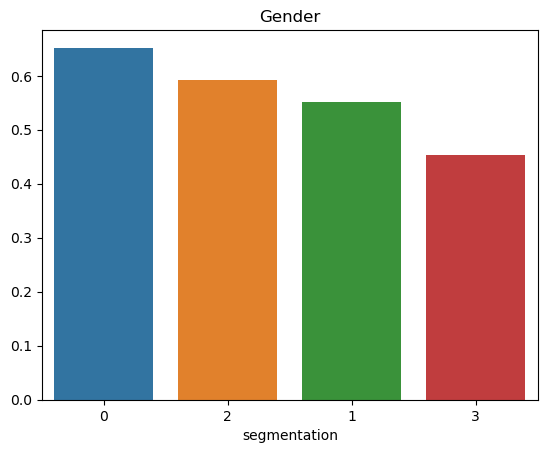

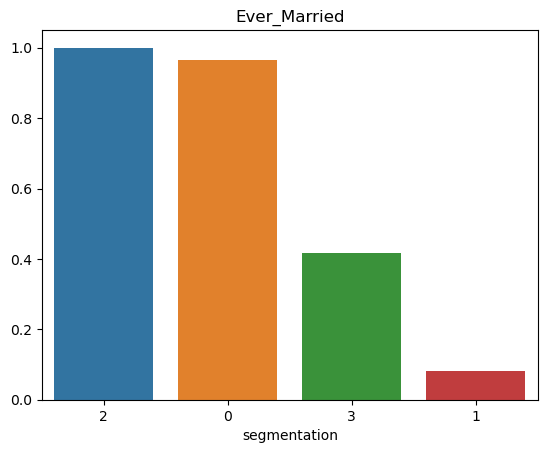

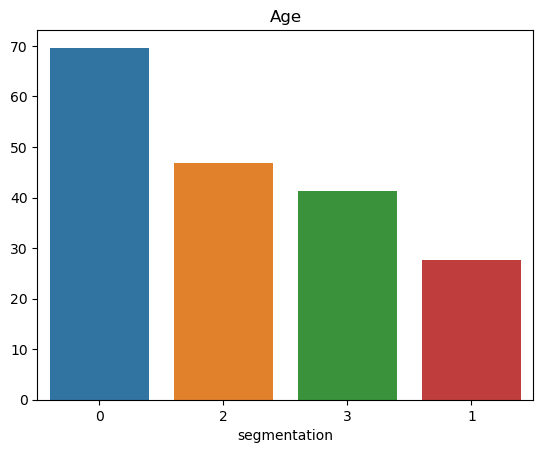

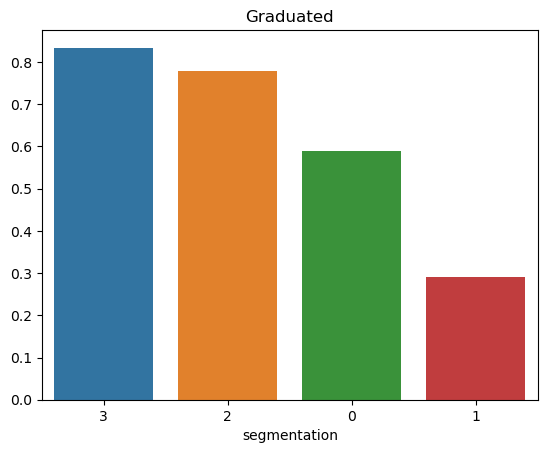

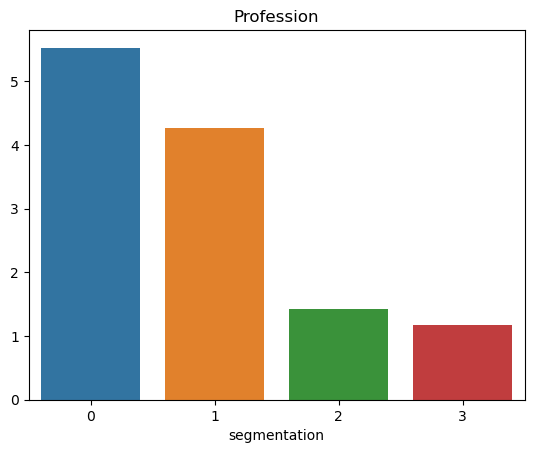

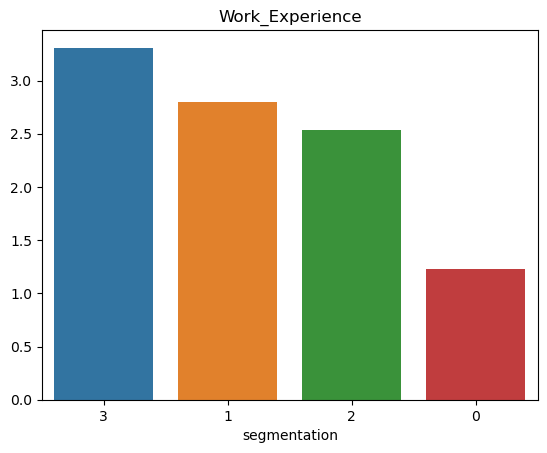

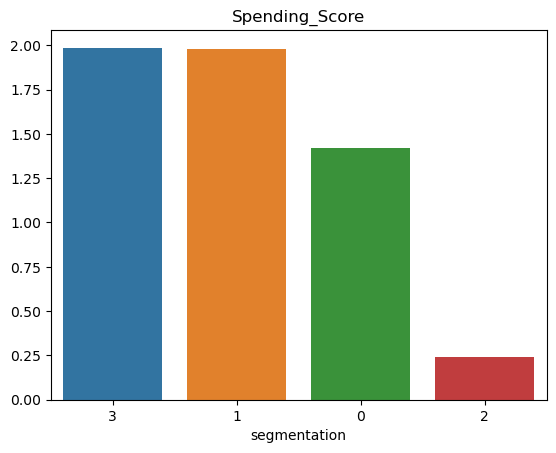

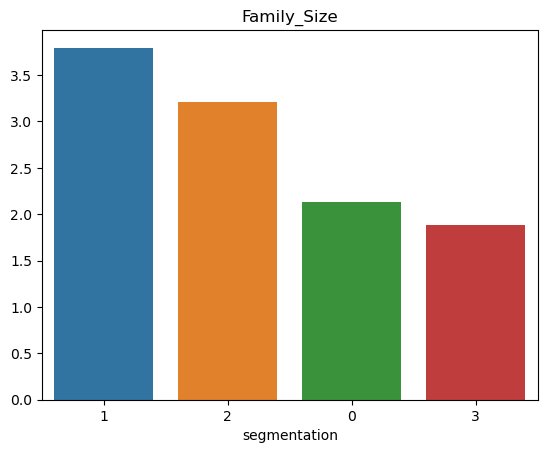

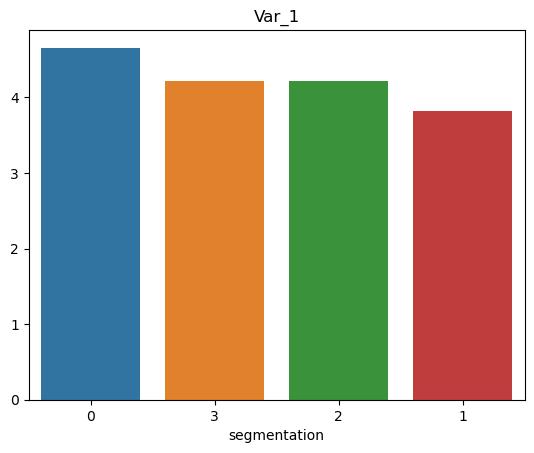

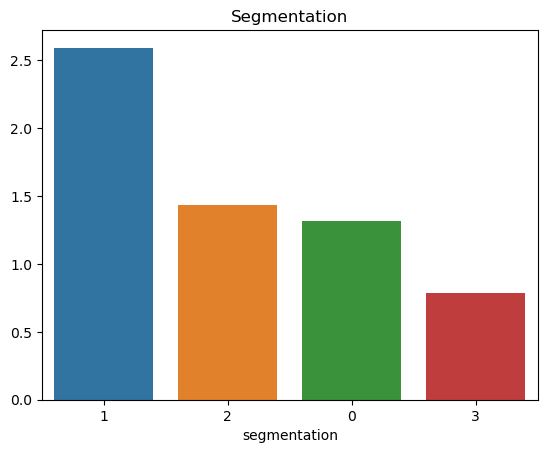

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in customer_kmeans_grp.columns:
    sns.barplot(x=customer_kmeans_grp[i].index,y=customer_kmeans_grp[i].values,order=customer_kmeans_grp[i].sort_values(ascending=False).index).set(title=i)
    #plt.title(f'{i}')
    plt.show()

In [29]:
customer_kmeans_grp=customer_kmeans.groupby('segmentation').mean().round(3)
customer_kmeans_grp

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
segmentation,,,,,,,,,,
0,0.652,0.964,69.640,0.589,5.527,1.226,1.418,2.127,4.657,1.315
1,0.551,0.082,27.652,0.291,4.270,2.801,1.978,3.795,3.822,2.591
2,0.592,1.000,46.795,0.778,1.420,2.536,0.240,3.205,4.218,1.433
3,0.454,0.417,41.307,0.834,1.179,3.309,1.986,1.885,4.223,0.784
